# Seleção de Features


## Selecionar as features úteis para o modelo usando uma das três técnicas: Filtragem, Wrapper e Embedding

A seleção de características é um passo crítico no pré-processamento de dados para aprendizado de máquina. Reduz a complexidade do modelo, diminui o tempo de treinamento e pode melhorar o desempenho do modelo ao eliminar características irrelevantes ou redundantes.

As técnicas de seleção de atributos englobam atividades de identificação e remoção de informações irrelevantes ou redundantes. Isso reduz a dimensionalidade dos dados e pode permitir que algoritmos de aprendizagem operem com maior rapidez, reduzindo o tempo de treinamento e aumentando a eficiência do modelo.

Outra vantagem da seleção de atributos é melhorar a precisão dos modelos, uma vez que os atributos irrelevantes podem contribuir para o ruído e para a ocorrência de overfitting, diminuindo a acurácia dos modelos.

A seleção de atributos ainda é capaz, em alguns casos, de aumentar a interpretabilidade dos dados, tendo em vista que a partir de um número reduzido de atributos, é mais fácil entender as relações entre os mesmos e as variáveis de interesse.

Existem três abordagens principais para a seleção de características: **Filtragem, Métodos Wrapper e Métodos Embutidos.**


**Definição:**

- **Filtragem:** Seleciona features com base em testes estatísticos independentes do modelo.
- **Wrapper:** Seleciona features treinando o modelo múltiplas vezes com diferentes subconjuntos de features.
- **Embedding:** Seleciona features como parte do processo de treinamento do modelo, como nos modelos baseados em árvores.


### Filtragem

A abordagem da filtragem envolve a avaliação de cada característica individualmente em relação à variável de resposta e a seleção das características mais relevantes.

Métodos comuns incluem:

- **Correlação:** Mede a relação linear entre a característica e a variável de resposta. Características com alta correlação positiva ou negativa podem ser selecionadas.
- **Informação Mútua:** Mede a dependência mútua entre a característica e a variável de resposta. Características com alta informação mútua são preferidas


![alt text](FIGURA-1-Selecao-de-Atributos.png)


Avaliar a correlação entre atributos é crucial na análise de dados, uma vez que evita a multicolinearidade entre os atributos. É possível dizer que variáveis fortemente correlacionadas representam a mesma informação e, portanto, não é preciso utilizá-las em conjunto.

O coeficiente de correlação de Pearson é capaz de identificar a correlação linear entre os atributos de entrada de um modelo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = pd.read_csv(url, header=None)

# Nomear as colunas
data.columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Converter o target para valores binários
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})


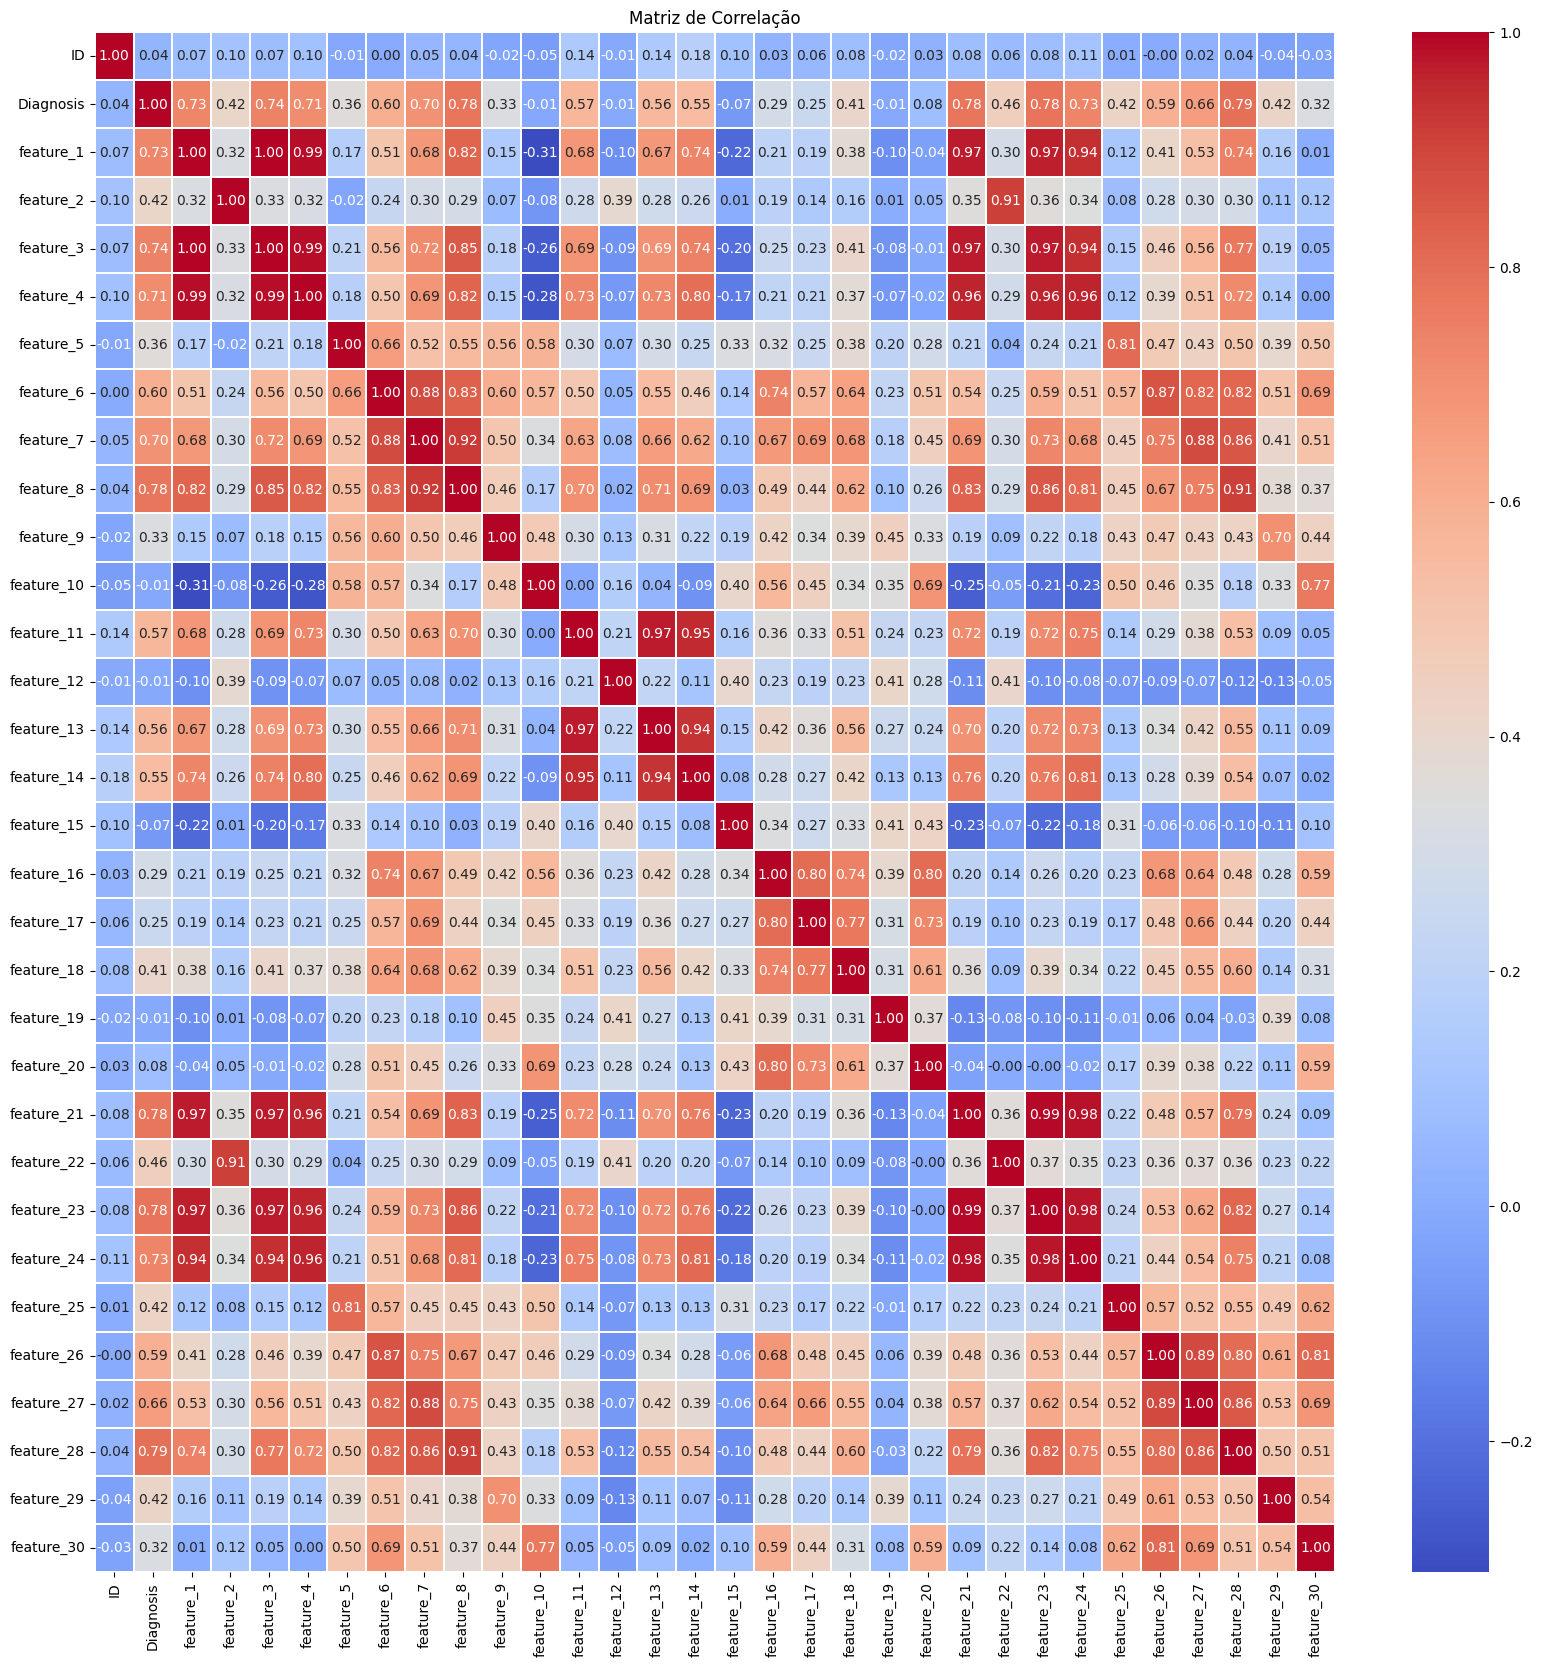

In [ ]:
# Visualizar a correlação das features com o target
plt.figure(figsize=(20, 20))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.1)
plt.title('Matriz de Correlação')
plt.show()

- Utilizar duas features com correlação maior que 0.95 __pode__ corresponder à uma redundância.
- Utilizar features que possuam uma correlação com o target muito próxima de zero, possivelmente não são úteis para o modelo e irão acarretar apenas maior peso computacional.

**Aplicando Filtragem**: Seleção de features baseada em métodos estatísticos.

- Exemplo com `SelectKBest`:
     - `class sklearn.feature_selection.SelectKBest(score_func=<function f_classif>, *, k=10)[source]`
     
          > - score_funccallable, default=f_classif
          >    - Função que recebe dois arrays X e y, e retorna um par de arrays (scores, pvalues) ou um único array com scores. O padrão é f_classif. A função padrão só funciona com tarefas de classificação.
          > 
          > - kint or “all”, default=10
          >    - Número de features principais a serem selecionados. A opção “all” ignora a seleção, para uso em uma pesquisa de parâmetros.


#### Dados aleatórios

(100, 5)


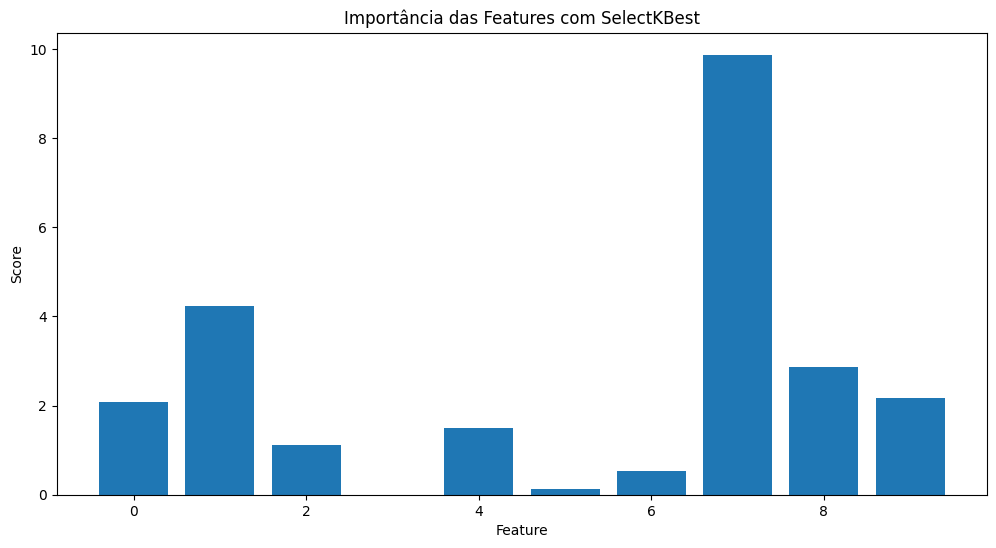

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Dados de exemplo (X: features, y: target)
X = np.random.randn(100, 10)
y = np.random.randint(0, 2, 100)

# Selecionar as 5 melhores features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Features selecionadas
print(X_new.shape)

# Gráfico
scores = selector.scores_

plt.figure(figsize=(12, 6))
plt.bar(range(len(scores)), scores)
plt.title('Importância das Features com SelectKBest')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.show()

#### Dataset Iris

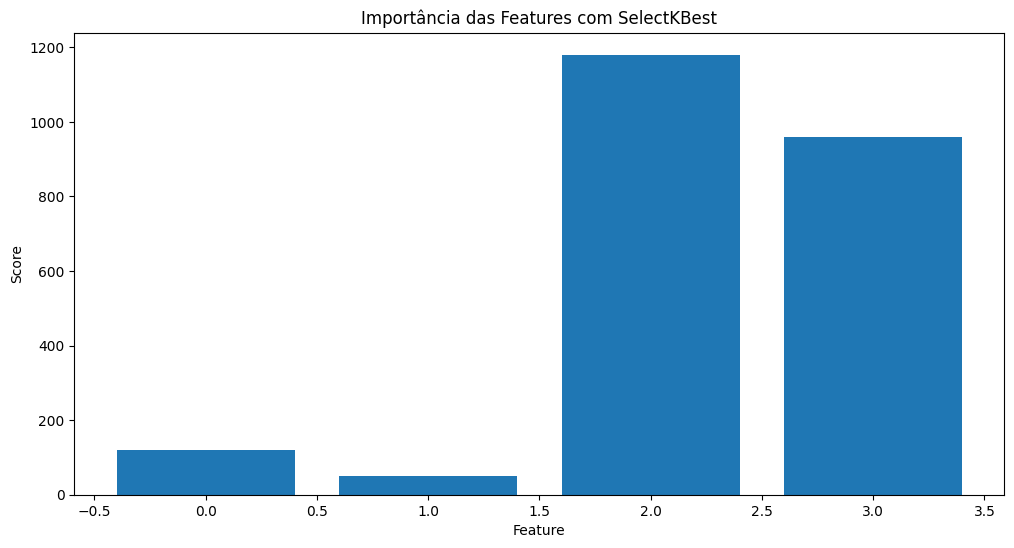

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
# Carregar dados de exemplo
iris = load_iris()
# print(iris)
X, y = iris.data, iris.target
# Selecionar as 2 melhores features
selector = SelectKBest(score_func=f_classif, k=2)
X_novas = selector.fit_transform(X, y)
# Gráfico
scores = selector.scores_
plt.figure(figsize=(12, 6))
plt.bar(range(len(scores)), scores)
plt.title('Importância das Features com SelectKBest')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.show()

#### Dataset de teste gerado com `make_classification`

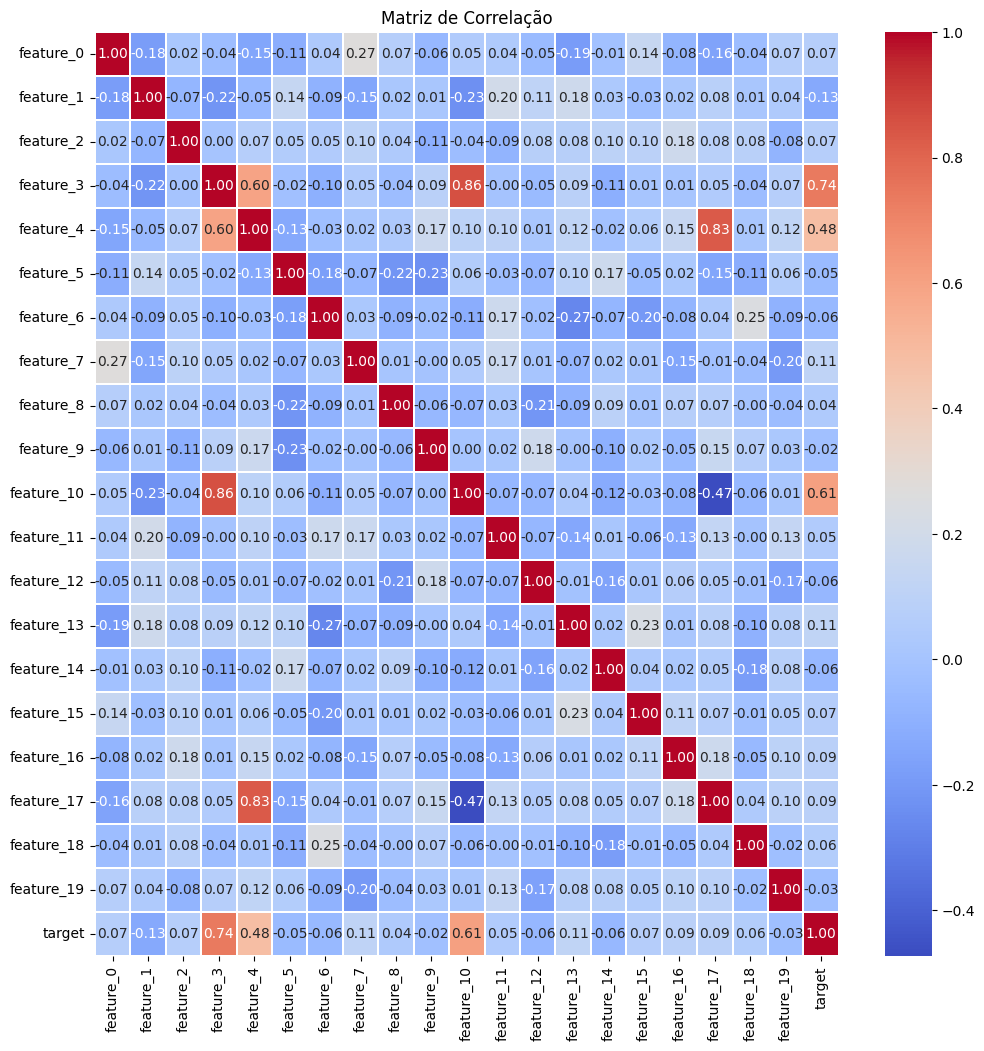

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Dados de exemplo (X: features, y: target)
X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, random_state=0)
# print(X,'\n\n',y)
plt.figure(figsize=(12, 12))
df = pd.DataFrame(X, columns= ['feature_'+str(i) for i in range(20)])
correlation_matrix = pd.concat([df, pd.Series(y, name='target')], axis=1).corr()
# sns.heatmap(X, y, cmap='coolwarm', cbar=True, linewidths=0.1)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.1)
plt.title('Matriz de Correlação')
plt.show()

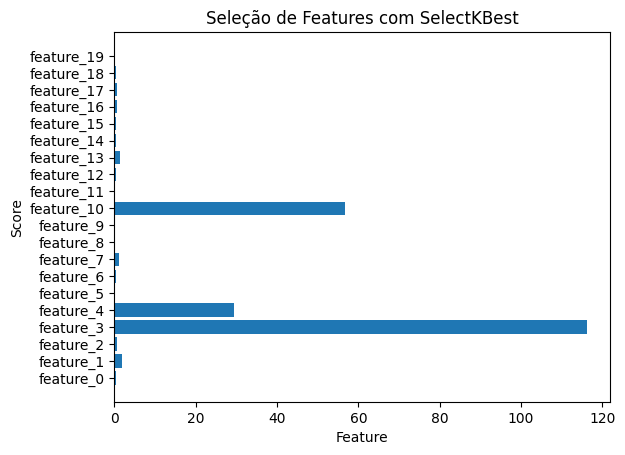

In [ ]:

# Selecionar as 5 melhores features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Exibir as scores das features
scores = selector.scores_
plt.barh(df.columns, scores)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Seleção de Features com SelectKBest')
plt.show()

#### Métodos de Filtragem de Features do sklearn

- **SelectKBest**: Seleciona os k recursos com as pontuações mais altas, removendo os demais.
- **SelectPercentile**: Seleciona uma porcentagem dos recursos com as pontuações mais altas, definida pelo usuário.
- **SelectFpr, SelectFdr, SelectFwe**: Métodos estatísticos que controlam diferentes tipos de erros (falsos positivos, descobertas falsas e erros de família) na seleção de recursos.
- **GenericUnivariateSelect**: Permite escolher entre diferentes estratégias de seleção de recursos univariados, incluindo as mencionadas acima, e otimizar a escolha da estratégia usando pesquisa de hiperparâmetros.

### **Wrapper:**


#### Métodos Wrapper (embrulho)

Os métodos wrapper avaliam várias combinações de características e selecionam a combinação que resulta no melhor desempenho do modelo.

Criam múltiplos subconjuntos de atributos e avaliam a importância de cada um na performance do modelo, selecionando aqueles que obtiveram o melhor desempenho. 

Utilizam um modelo de aprendizado de máquina para avaliar a importância de cada subconjunto de atributos. Ao contrário das técnicas de seleção por filtro, as técnicas de seleção baseadas em wrapper apresentam alto custo computacional.
Possui uma considerável dependência do tipo de modelo de aprendizado escolhido.

- **Sequential Feature Selection (SBS ou SFS)**: Elimina features adicionando ou removendo-as consecutivamente, recalculando o modelo. SBS remove features que menos contribuem para o modelo. SFS adiciona features que mais contrinuem.
- **Recursive Feature Elimination (RFE)**: Elimina features recursivamente, ajustando o modelo e removendo a feature menos importante. O processo é repetido até que o número desejado de features seja atingido.
- **Recursive Feature Addition (RFA)**: Adiciona features recursivamente, ajustando o modelo e adicionando a feature mais importante. O processo é repetido até que o número desejado de features seja atingido.
- **Exhaustive Feature Selection (EFS)**: Avalia todas as combinações possíveis de features, selecionando a melhor combinação. É computacionalmente caro e não é recomendado para datasets grandes.
- **Genetic Algorithm Feature Selection (GAFS)**: Utiliza algoritmos genéticos para selecionar as melhores features. É computacionalmente caro e não é recomendado para datasets grandes.


![alt text](FIGURA-3-Selecao-de-Atributos.avif)

#### **Wrapper**: Seleção de features usando um modelo preditivo. 
- Exemplo com `RFE`:


`class sklearn.feature_selection.RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')[source]`

> - estimator
    > 
    >   - Instância de Estimador: Um estimador de aprendizado supervisionado com um método fit que fornece informações sobre a importância dos recursos (por exemplo, coef_, feature_importances_).
    > - n_features_to_select
    >  
    >   - int ou float, default=None: O número de recursos a serem selecionados. Se None, metade dos recursos são selecionados. Se inteiro, o parâmetro é o número absoluto de recursos a serem selecionados. Se float entre 0 e 1, é a de recursos a serem selecionados.
    > 
    > - step
    > 
    >   - int ou float, default=1: Se maior ou igual a 1, então step corresponde ao número (inteiro) de recursos a serem removidos em cada iteração. Se estiver dentro de (0.0, 1.0), então step corresponde à porcentagem (arredondada para baixo) de recursos a serem removidos em cada iteração.

Features Originais:  (100, 20) 
Features Selecionadas:  (100, 5)


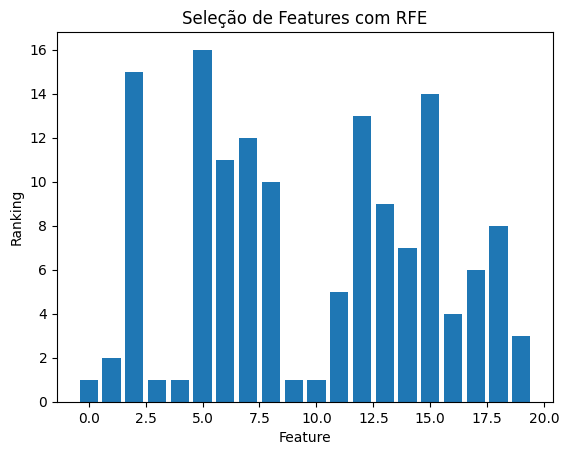

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Dados de exemplo (X: features, y: target)
X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, random_state=0)

# Aplicar RFE com Logistic Regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_new = rfe.fit_transform(X, y)

print('Features Originais: ', X.shape, '\nFeatures Selecionadas: ', X_new.shape)

# Exibir ranking das features
ranking = rfe.ranking_
plt.bar(range(len(ranking)), ranking)
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.title('Seleção de Features com RFE')
plt.show()

##### **Cuidado!** Mesmo em numeros gerados aleatoriamente os modelos são capazes de inferir correspondencias.


(100, 5)


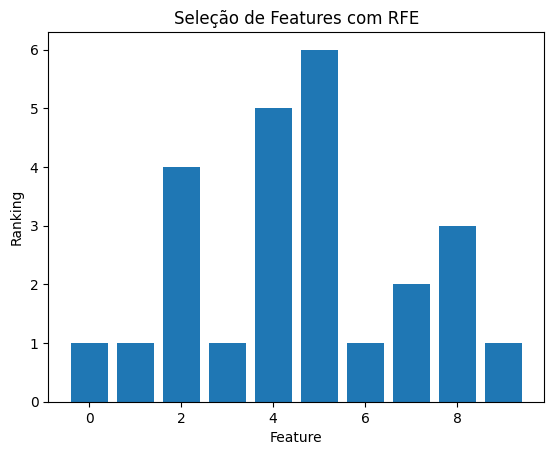

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Dados de exemplo (X: features, y: target)
X = np.random.randn(100, 10)
y = np.random.randint(0, 2, 100)

# Aplicar RFE com Logistic Regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_new = rfe.fit_transform(X, y)

# Features selecionadas
print(X_new.shape)


# Exibir ranking das features
ranking = rfe.ranking_
plt.bar(range(len(ranking)), ranking)
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.title('Seleção de Features com RFE')
plt.show()

#### Exemplo de uso `SFS` **(Sequential Feature Selector):**

`class sklearn.feature_selection.SequentialFeatureSelector(estimator, *, n_features_to_select='auto', tol=None, direction='forward', scoring=None, cv=5, n_jobs=None)[source]`

> * Estimador de Estimators
> 
>   * Um estimador não ajustado.
> 
> * n_features_to_select "auto", int ou float, padrão="auto"
> 
>   * Se "auto", o comportamento depende do parâmetro tol:
>   Se tol não for None, então as features são selecionadas enquanto a mudança de pontuação não exceder tol.
>   Caso contrário, metade das features são selecionadas.
> 
> * tol float, padrão=None
> 
>   * Se a pontuação não for incrementada pelo menos por tol entre duas adições ou remoções de features consecutivas, pare de adicionar ou remover.
> tol pode ser negativo ao remover features usando direction="backward". Pode ser útil reduzir o número de features ao custo de uma pequena diminuição na pontuação.
> tol é habilitado apenas quando n_features_to_select é "auto".
> 
> * direction {'forward', 'backward'}, padrão='forward'
> 
>   * Se deve realizar seleção direta ou seleção inversa.
> 
> * scoring str ou callable, padrão=None
> 
>   * Uma única str (veja O parâmetro scoring: definindo regras de avaliação de modelo) ou um callable (veja Definindo sua estratégia de scoring a partir de funções métricas) para avaliar as previsões no conjunto de teste.

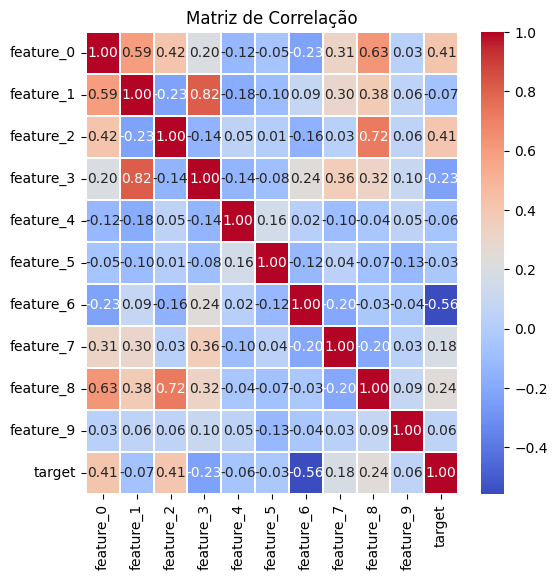

[' 0', ' 1', ' 2', ' 3', ' 4', ' 5', ' 6', ' 7', ' 8', ' 9']
[ True False  True False False False  True False False False]


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import pandas as pd

# Dados de exemplo
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=2, random_state=0)
df = pd.concat([pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)]), pd.Series(y.T, name='target')], axis=1)

# Calcular a correlação entre características e a variável de resposta
correlation_matrix = df.corr()
# print(correlation_matrix['target'].sort_values(ascending=False))

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.1)
plt.title('Matriz de Correlação')
plt.show()

# Modelo base
model = LinearRegression()
# Sequential Feature Selector
sfs = SequentialFeatureSelector(model, n_features_to_select=3, direction='forward')
sfs.fit(X, y)
# print(df.columns)
print([' '+str(i) for i in range(10)])
print(sfs.get_support())  # Características selecionadas

## Métodos Embutidos / Incorporados

Os métodos embutidos realizam a seleção de características ***durante*** o processo de treinamento do modelo. O modelo de treinamento já é elaboraborado para lidar com a seleção de feutures enquanto realiza o aprendizado.



![alt text](FIGURA-4-Selecao-de-Atributos.avif)

Alguns métodos como a **regressão Lasso e Ridge** são capazes de selecionar os atributos mais relevantes de maneira automática ainda no processo de treinamento. Esses métodos têm o objetivo de lidar com o problema de multicolinearidade, em que há alta correlação entre os atributos de entrada. 

Os algoritmos de regressão Lasso e Ridge utilizam algumas funções de penalização. 

  - Na regressão Lasso, uma penalização é adicionada pelo valor absoluto dos coeficientes dos atributos. O objetivo é forçar alguns dos coeficientes a serem iguais a zero, o que leva a uma seleção automática de atributos. 

  - Na regressão Ridge, a penalização se resume a uma restrição à soma dos quadrados dos coeficientes dos atributos. O objetivo deste método é reduzir a magnitude dos coeficientes, evitando a ocorrência de overfitting.


Outros exemplos incluem Árvores de Decisão e Florestas Aleatórias, que calculam a importância das características durante o ajuste do modelo.


Exemplo de aplicação **Embedding**: Seleção de features integrada ao processo de treinamento. 
- Exemplo com `Lasso`:
`class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')[source]`

> - alpha float, padrão=1.0
>  
>   - Constante que multiplica o termo L1, controlando a força da regularização. *alpha* deve ser um float não negativo, ou seja, em [0, inf). 
>   - Quando alpha = 0, o objetivo é equivalente à regressão por mínimos quadrados ordinários, resolvido pelo objeto LinearRegression. Por razões numéricas, usar alpha = 0 com o objeto Lasso não é aconselhável. Em vez disso, você deve usar o objeto - LinearRegression.
> 
> - fit_intercept bool, padrão=True
>   - Se deve calcular a interceptação para este modelo. Se definido como False, nenhuma interceptação será usada nos cálculos (ou seja, espera-se que os dados sejam centralizados).
>  
> - precompute bool ou array-like de forma (n_features, n_features), padrão=False
>   - Se deve usar uma matriz de Gram pré-computada para acelerar os cálculos. A matriz de Gram também pode ser passada como argumento. Para entrada esparsa, esta opção é sempre False para preservar a esparsidade.
>   
> - copy_X bool, padrão=True
>   - Se True, X será copiado; caso contrário, pode ser sobrescrito.
>   
> - max_iter int, padrão=1000
>   - O número máximo de iterações.
> 
> - tol float, padrão=1e-4
>   - A tolerância para a otimização: se as atualizações forem menores que tol, o código de otimização verifica o gap dual para otimalidade e continua até que seja menor que tol, veja Notas abaixo.
> 
> - warm_start bool, padrão=False
>   - Quando definido como True, reutilize a solução da chamada anterior para ajustar como inicialização, caso contrário, apenas apague a solução anterior. Veja o Glossário.
>   
> - positive bool, padrão=False
>   - Quando definido como True, força os coeficientes a serem positivos.
> 
> - random_state int, instância RandomState, padrão=None
>   - A semente do gerador de números pseudo-aleatórios que seleciona uma feature aleatória para atualizar. Usado quando selection == 'random'. Passe um int para saída reprodutível em várias chamadas de função. Veja o Glossário.
> 
> - selection {'cyclic', 'random'}, padrão='cyclic'
>   - Se definido como 'random', um coeficiente aleatório é atualizado a cada iteração em vez de percorrer as features sequencialmente por padrão. Isso (definir como 'random') geralmente leva a uma convergência significativamente mais rápida, - especialmente quando tol é maior que 1e-4.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_classification

# Dados de exemplo (X: features, y: target)
X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, random_state=0)

# Aplicar Lasso para seleção de features
model = Lasso(alpha=0.1)
model.fit(X, y)

# Coeficientes do modelo
print(model.coef_)

[ 0.        -0.         0.         0.2193892  0.        -0.
  0.         0.         0.        -0.         0.         0.
 -0.         0.         0.         0.         0.         0.
  0.        -0.       ]


Exemplo de uso de uma Árvore de Decisão em Python:

- Exemplo com `DecisionTreeRegressor`

        class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=1)

# Modelo de Árvore de Decisão
model = DecisionTreeRegressor()

# Ajuste do modelo
model.fit(X, y)

# Importâncias das características
importances = model.feature_importances_
print(importances)

[0.03514789 0.06822183 0.02293923 0.29192753 0.00529455 0.00645156
 0.04129977 0.2191923  0.05612201 0.25340332]


Exemplo de uso de Floresta Aleatória em Python:

- Exemplo com `DecisionTreeRegressor`

        class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, random_state=0)

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

print(importances)

[0.10405693 0.10277861 0.08118616 0.10975744 0.09006217 0.11291782
 0.09762155 0.09261881 0.09658331 0.1124172 ]


- **Feature Importance**: Utiliza a importância das features de modelos de aprendizado de máquina para selecionar as melhores features.
- **Feature Permutation**: Avalia a importância das features ao permutar seus valores e medir o impacto na performance do modelo.
- **Feature Shuffling**: Avalia a importância das features ao embaralhar seus valores e medir o impacto na performance do modelo.
- **Feature Clustering**: Agrupa features semelhantes e seleciona um representante de cada cluster.
- **Feature Correlation**: Remove features altamente correlacionadas, mantendo apenas uma de cada grupo.

# **Síntese**

A seleção de atributos é uma etapa do pré-processamento de dados muito importante. Dentre suas vantagens, pode-se destacar a melhoria na acurácia e eficiência dos modelos; redução da complexidade e facilidade na interpretabilidade dos dados. 

Foram apresentadas algumas das principais técnicas de seleção de atributos, com destaque para as seleções por **filtro**, por **wrapper** e por **embedded**.

- Os métodos baseados em **filtro** são computacionalmente eficientes e independentes dos modelos, porém ignoram as interações entre atributos e, em alguns casos, podem não identificar o subconjunto ótimo de variáveis. 

- Os algoritmos de seleção por **wrapper**, por sua vez, analisam a interação entre atributos e podem identificar o subconjunto ótimo para um modelo específico. Porém são métodos computacionalmente caros e sujeitos a ocorrência de overfitting.

- As técnicas de seleção por **embedded** são indicadas para lidar com conjunto de dados de alta dimensão, com muitos atributos, podendo não lidar muito bem com amostras pequenas, além de depender da escolha dos parâmetros de regularização dos modelos implementados.

A melhor técnica vai depender de escolha particular e tentativa e erro e outras metodologias de análise para o problema específico, sendo que cada uma das abordagens de seleção de atributos possui pontos positivos e negativos.